In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from peakfit import *

# Test peak fit

## Implemented peak functions

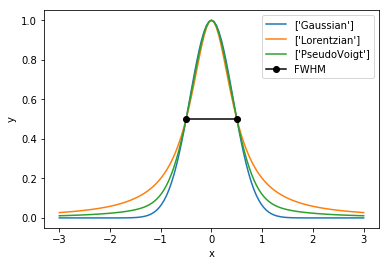

In [2]:
x = np.linspace(-3, 3, 123)

f = Gauss()
plt.plot(x, f(x, 0, 1, 1), label=f.name);

f = Lorentzian()
plt.plot(x, f(x, 0, 1, 1), label=f.name);

f = PseudoVoigt()
plt.plot(x, f(x, 0, 1, 1, 0.5), label=f.name);


plt.plot([-.5, .5], [.5, .5], 'o-k', label='FWHM'); # test FWHM
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## Simple fit

{'function': 'Gaussian', 'x0': 0.5045631693327199, 'x0_std': 0.021782634238457964, 'fwhm': 1.0319260635068186, 'fwhm_std': 0.05370953153601033, 'amplitude': 1.006878081089575, 'amplitude_std': 0.043934377727433374}
{'function': 'Linear', 'slope': -0.00015936676275510824, 'slope_std': 0.003390563871380725, 'intercept': 6.973074116899421, 'intercept_std': 0.011174742039983592}


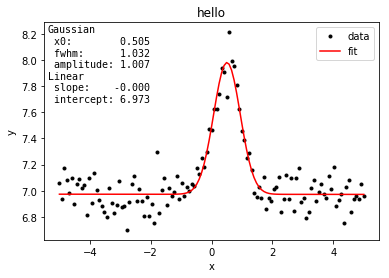

In [3]:
# Generate random data
x = np.linspace(-5, 5, 123)
y = 7 + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, Gauss())

# _note:_ a linear slope is by default included
# set background=None to prevent this

for r in results:
    print(r)

# Graph
plot_results(x, y, results, fit,
             save_path='./example/',
             save_name='hello');

## With a linear background

{'function': 'Gaussian', 'x0': 0.5179098395246252, 'x0_std': 0.019457697358930333, 'fwhm': 0.9707381843414783, 'fwhm_std': 0.04783635181061098, 'amplitude': 1.0171510304861342, 'amplitude_std': 0.042115762828559875}
{'function': 'Linear', 'slope': 0.10047674528270016, 'slope_std': 0.0031541130440308944, 'intercept': 6.9928371868858905, 'intercept_std': 0.010310450959403432}


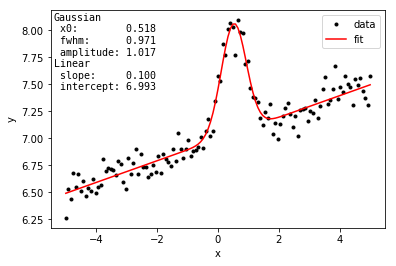

In [4]:
# Generate random data data
x = np.linspace(-5, 5, 123)
y = 7 + 0.1*x + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit using manual estimation of initial parameters:
results, fit = peakfit(x, y, Gauss(0, 1, 1))

for r in results:
    print(r)

# Graph
plot_results(x, y, results, fit);

{'function': 'Gaussian', 'x0': 0.5727203177860446, 'x0_std': 0.061242362027650196, 'fwhm': 1.1362370906228068, 'fwhm_std': 0.1442147427216229, 'amplitude': 1.0223793980771112, 'amplitude_std': 0.11238305955279763}


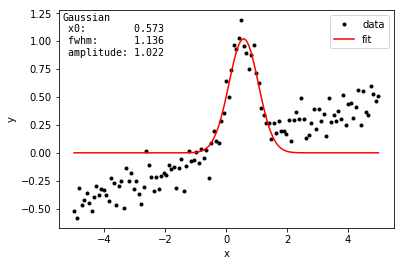

In [5]:
# Generate data
x = np.linspace(-5, 5, 123)
y = 0.1*x + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit without the linear background:
results, fit = peakfit(x, y, Gauss(0.6, 1, 1), background=None)

for r in results:
    print(r)

# Graph
plot_results(x, y, results, fit);

## Multi-peak

{'function': 'Gaussian', 'x0': -1.49148467667243, 'x0_std': 0.01891598282334905, 'fwhm': 1.462255767313159, 'fwhm_std': 0.04975973523696199, 'amplitude': 1.016409611025007, 'amplitude_std': 0.0266411951926121}
{'function': 'Gaussian', 'x0': 0.49908227851250475, 'x0_std': 0.020580244805655623, 'fwhm': 1.0068897412051427, 'fwhm_std': 0.05114317583466776, 'amplitude': 0.7881939525794199, 'amplitude_std': 0.03121643733108255}
{'function': 'Linear', 'slope': 0.0023613785752025244, 'slope_std': 0.002115245293455593, 'intercept': -0.007665590884462763, 'intercept_std': 0.008876718844765546}


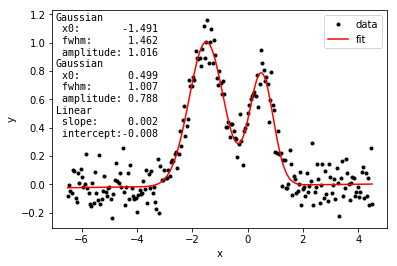

In [6]:
# Generate random data
x = np.linspace(-6.5, 4.5, 234)
y = 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 0.8)
y += Gauss()(x, -1.5, 1.5, 1.)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, Sum(Gauss(-2, 1, 1), Gauss(1, 1, 1)))

for r in results:
    print(r)
    
# Graph
plot_results(x, y, results, fit);

## Pseudo Voigt

{'function': 'PseudoVoigt', 'x0': 0.3976380429378915, 'x0_std': 0.0031468427306842036, 'fwhm': 0.9962439418320161, 'fwhm_std': 0.010452968649696678, 'amplitude': 0.9967617188420304, 'amplitude_std': 0.006834422479943974, 'eta': 0.3724584223295498, 'eta_std': 0.026602212534976504}


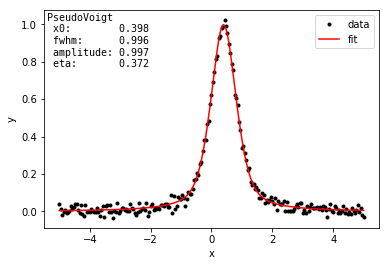

In [7]:
# Generate random data
x = np.linspace(-5, 5, 211)
y = 0.02*np.random.randn(*x.shape)
y += PseudoVoigt()(x, 0.4, 1, 1, 0.4)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, PseudoVoigt(), background=None)

for r in results:
    print(r)

# Graph
f = plot_results(x, y, results, fit, save_path='./example');